## Real Case "SMALL DATA"

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom1.png' width=900>

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom2.png' width=900>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx

#Target colonna "costi anno 2020"

In [31]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx'

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/pandas_.png' width=500>

In [58]:
# Step 1 Carichiamo il datset su un Dataframe
df = pd.read_excel(path)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28599,8175,18615,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7920,8021,company8021,80757,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28600,8176,18616,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7921,8022,company8022,74478,n.d.,n.d.,7000,n.d.,n.d.,2529,n.d.,...,28601,8177,18617,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7922,8023,company8023,0,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,...,28602,8178,18618,5253,n.d.,n.d.,303714,n.d.,n.d.,Produ


In [59]:
# Step 2: Verifichiamo il dtypes, oopss... funziona solo per un numero ridotto di colonne, pazienza... 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Columns: 171 entries, index to var159
dtypes: int64(68), object(103)
memory usage: 10.3+ MB


In [60]:
def display_col_info(df):
    # create a dictionary to store the number of unique values and data type of each column
    col_info = {'Unique_values': df.nunique(), 'Dtype': df.dtypes}
    col_info_df = pd.DataFrame(col_info).T
    col_info_df.index.name = 'Column'
    col_info_df = col_info_df.reset_index()
    return col_info_df.set_index('Column').T.sort_values('Unique_values')

In [61]:
display_col_info(df)

Column,Unique_values,Dtype
var159,1,object
var144,1,object
var145,1,object
var146,1,object
var25,2,object
...,...,...
Codice fiscale,7924,int64
Partita IVA,7924,int64
Ragione sociale,7924,object
ATECO 2007\ncodice,7924,object


In [62]:
# Step 3: Verifichiamo le mediane delle colonne numeriche
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var3                     0.0
var6                 13038.0
var9                303505.0
                     ...    
Numero CCIAA         24641.5
Codice fiscale        4217.5
Partita IVA          14657.5
var153                   0.0
var156              102919.5
Length: 68, dtype: float64

In [63]:
df.median(numeric_only=True).sort_values()

var81                    0.0
var153                   0.0
var82                    0.0
var83                    0.0
var60                    0.0
                     ...    
var99               834556.5
var66               864360.5
var51              1446569.0
costi anno 2020    1611384.0
var93              1672529.5
Length: 68, dtype: float64

In [64]:
#ci sono delle stringhe in var1 var2 pur essendo numeriche, come mai??
#inoltre anche se non numeriche Numero CCIAA e Codice fiscale e PIVA non sono numeri che posso utilizzare, bensì ID
df['var2'].value_counts()


var2
n.d.       751
0          159
188805       2
491378       2
584036       2
          ... 
4015463      1
4204346      1
3390674      1
3778266      1
169365       1
Name: count, Length: 7012, dtype: int64

In [65]:
## Trovato!! Abbiamo il nostro primo n.d. che sporca la colonna
# Step 4: Spstituiamo su tutto il dataset n.d. con 0

df = df.replace({'n.d.':0})
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,...,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,...,28600,8176,18616,0,0,0,0,0,0,Produ
7921,8022,company8022,74478,0,0,7000,0,0,2529,0,...,28601,8177,18617,0,0,0,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,0,0,...,28602,8178,18618,5253,0,0,303714,0,0,Produ


In [66]:
# check Nan values
df.isnull().sum().sort_values(ascending=False) # ce ne sono 2, le droppo

Indirizzo sede legale             2
Indirizzo sede legale - Comune    2
index                             0
var105                            0
var107                            0
                                 ..
var56                             0
var57                             0
var58                             0
var59                             0
var159                            0
Length: 171, dtype: int64

In [67]:
# Step 5: Sono solo 2 righe, possiamo droppare i Nan
df = df.dropna()
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,...,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,...,28600,8176,18616,0,0,0,0,0,0,Produ
7921,8022,company8022,74478,0,0,7000,0,0,2529,0,...,28601,8177,18617,0,0,0,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,0,0,...,28602,8178,18618,5253,0,0,303714,0,0,Produ


In [68]:
## Step 5.1 drop duplicates
df = df.drop_duplicates()
df  #still 7922 --> no duplicates

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,...,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,...,28600,8176,18616,0,0,0,0,0,0,Produ
7921,8022,company8022,74478,0,0,7000,0,0,2529,0,...,28601,8177,18617,0,0,0,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,0,0,...,28602,8178,18618,5253,0,0,303714,0,0,Produ


In [69]:
# adesso la mediana comprende anche var2 e var3 e tutte le colonne che prima venivano viste come object
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var1               1478972.0
var2               1349412.5
var3                     0.0
                     ...    
var154                   0.0
var155                   0.0
var156              102919.5
var157               85859.0
var158               65776.0
Length: 163, dtype: float64

In [70]:
# Step 6: Cerchiamo tutte le colonne dove la MEDIANA è ==0
median_values = df.median(numeric_only=True)
columns_with_zero_median = median_values.where(median_values == 0).dropna().index
columns_with_zero_median = columns_with_zero_median.to_list()
len(columns_with_zero_median)

## Droppiamo questa liste di colonne
df = df.drop(columns_with_zero_median,axis=1)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,...,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,...,Nerviano,Milano,Lombardia,20680,256,10696,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,...,Milano,Milano,Lombardia,20681,257,10697,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,...,Valle Lomellina,Pavia,Lombardia,20682,258,10698,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,...,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,...,Moretta,Cuneo,Piemonte,20684,260,10700,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,1500,0,0,0,0,...,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,0,0,Produ
7920,8021,company8021,80757,0,0,1500,0,0,0,0,...,Monza,Monza e della Brianza,Lombardia,28600,8176,18616,0,0,0,Produ
7921,8022,company8022,74478,0,0,2529,0,0,0,0,...,Santa Lucia del Mela,Messina,Sicilia,28601,8177,18617,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,16295937,0,...,Reggio nell'Emilia,Reggio nell'Emilia,Emilia-Romagna,28602,8178,18618,303714,0,0,Produ


In [71]:
df.columns

Index(['index', 'Ragione sociale', 'costi anno 2020', 'var1', 'var2', 'var6',
       'var7', 'var8', 'var9', 'var10',
       ...
       'Indirizzo sede legale - Comune', 'Provincia',
       'Indirizzo sede legale - Regione', 'Numero CCIAA', 'Codice fiscale',
       'Partita IVA', 'var156', 'var157', 'var158', 'var159'],
      dtype='object', length=108)

In [72]:
#check colonne stringhe
for col in df.columns.to_list():
    if df[col].dtype == 'object':
        print(col)
    else:
        pass

Ragione sociale
ATECO 2007
codice
Indirizzo sede legale
Indirizzo sede legale - Codice postale
Indirizzo sede legale - Comune
Provincia
Indirizzo sede legale - Regione
var159


In [ ]:
# rimuovo le variabili specifiche del singolo observation e quelle categoriche come prima approssimazione

id_riga = ['index', 'Ragione sociale', 'Indirizzo sede legale - Comune', 'Provincia','Indirizzo sede legale - Regione', 
           'Numero CCIAA', 'Codice fiscale','Partita IVA','var159','ATECO 2007\ncodice','Indirizzo sede legale', 'Indirizzo sede legale - Codice postale',
           ]

df = df.drop(id_riga,axis=1)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,258220,478455,494325,473999,60,60,65,1000000,0,1188439
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,81879,0,0,1500,0,0,0,0,0,0,...,0,20613,0,0,10,0,0,0,0,0
7920,80757,0,0,1500,0,0,0,0,0,0,...,0,7903,0,0,29,0,0,0,0,0
7921,74478,0,0,2529,0,0,0,0,0,0,...,0,-669,0,0,1,0,0,0,0,0
7922,0,0,0,0,0,0,16295937,0,0,39881,...,0,-1035385,0,0,0,0,0,303714,0,0


In [74]:
## CHECK ZERI per righe
# aggiungo il conteggio degli zeri per riga e li sommo
# nella colonna Total_Zeros

df['Total_Zeros'] = (df == 0).sum(axis=1) 
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,81879,0,0,1500,0,0,0,0,0,0,...,20613,0,0,10,0,0,0,0,0,75
7920,80757,0,0,1500,0,0,0,0,0,0,...,7903,0,0,29,0,0,0,0,0,75
7921,74478,0,0,2529,0,0,0,0,0,0,...,-669,0,0,1,0,0,0,0,0,74
7922,0,0,0,0,0,0,16295937,0,0,39881,...,-1035385,0,0,0,0,0,303714,0,0,72


In [75]:
df.shape[1] # numero colonne

97

In [76]:
threshold_zeri_riga = 0.25 * df.shape[1] # tengo solo le righe con max 25% di zeri totali

# Drop rows where 'Total_Zeros' is greater than the threshold
df = df[df['Total_Zeros'] <= threshold_zeri_riga].reset_index(drop=True)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,30000,0,0,120804,150689,184664,1346693,1512073,1591765,1041499,...,-7192,-42112,-64651,1,1,1,629680,689997,793990,15
6467,7369,0,0,652842,533673,579484,694890,630706,389427,16583,...,-1065954,-928899,-224535,3,3,0,1733333,2266666,996294,12
6468,0,0,0,59232,0,0,3033737,3645899,3708988,754,...,10511,157930,168111,0,1,1,0,0,650000,14
6469,0,0,0,184237,182677,182677,1835816,1835816,1835816,747,...,144768,133586,135861,0,0,0,425449,609172,1174010,23


In [ ]:
# Ulteriore filtro per le colonne che ha max num di zeri == 30%
zeros_per_column = (df == 0).sum()
threshold_zeri_colonna = 0.30 * df.shape[0] # max 30% dei valori == 0 per colonna
df = df.loc[:, zeros_per_column <= threshold_zeri_colonna]
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var27,...,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,9312470,...,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,34529004,...,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,17498000,...,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25923161,...,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,18950865,...,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,30000,0,0,120804,150689,184664,1346693,1512073,1591765,0,...,-7192,-42112,-64651,1,1,1,629680,689997,793990,15
6467,7369,0,0,652842,533673,579484,694890,630706,389427,98955,...,-1065954,-928899,-224535,3,3,0,1733333,2266666,996294,12
6468,0,0,0,59232,0,0,3033737,3645899,3708988,0,...,10511,157930,168111,0,1,1,0,0,650000,14
6469,0,0,0,184237,182677,182677,1835816,1835816,1835816,0,...,144768,133586,135861,0,0,0,425449,609172,1174010,23


In [78]:
df['costi anno 2020']

0       144205134
1       140165127
2       145190000
3       112760368
4       171980718
          ...    
6466        30000
6467         7369
6468            0
6469            0
6470            0
Name: costi anno 2020, Length: 6471, dtype: int64

In [79]:
## Sposto la TARGET alla fine, per comodità con iLOC
df['costi'] = df['costi anno 2020']
df = df.drop(columns='costi anno 2020')
df

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
0,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,9312470,7915379,...,1534078,3813249,229,214,207,25290616,24108358,24535319,2,144205134
1,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,34529004,35683884,...,2124721,2204557,454,411,456,14133394,10404117,12898505,0,140165127
2,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,17498000,12270000,...,3170000,2408000,116,165,168,31861000,22494000,24687000,1,145190000
3,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25923161,17921979,...,494325,473999,60,60,65,1000000,0,1188439,2,112760368
4,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,18950865,16878270,...,1243727,869544,171,141,132,27325115,24037285,24492237,0,171980718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,0,0,120804,150689,184664,1346693,1512073,1591765,0,0,...,-42112,-64651,1,1,1,629680,689997,793990,15,30000
6467,0,0,652842,533673,579484,694890,630706,389427,98955,23225,...,-928899,-224535,3,3,0,1733333,2266666,996294,12,7369
6468,0,0,59232,0,0,3033737,3645899,3708988,0,0,...,157930,168111,0,1,1,0,0,650000,14,0
6469,0,0,184237,182677,182677,1835816,1835816,1835816,0,0,...,133586,135861,0,0,0,425449,609172,1174010,23,0


## EDA

In [80]:
df.corr()

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
var1,1.000000,0.987547,0.134738,0.129159,0.233327,0.647802,0.633815,0.619824,0.645127,0.652643,...,0.310596,0.389012,0.635814,0.622623,0.636249,0.453855,0.484458,0.532176,-0.356188,0.986923
var2,0.987547,1.000000,0.182928,0.193004,0.265701,0.653298,0.640064,0.628021,0.641059,0.650040,...,0.286862,0.377716,0.628592,0.617922,0.635112,0.476227,0.515633,0.536387,-0.350101,0.979383
var6,0.134738,0.182928,1.000000,0.873948,0.813744,0.189480,0.182559,0.164996,0.114119,0.109313,...,0.030351,0.105992,0.145639,0.139478,0.134268,0.759382,0.482058,0.243546,-0.033198,0.175843
var7,0.129159,0.193004,0.873948,1.000000,0.725457,0.226065,0.216399,0.193519,0.125834,0.113611,...,-0.030392,0.083989,0.151559,0.146905,0.135122,0.658065,0.639384,0.317756,-0.034134,0.183982
var8,0.233327,0.265701,0.813744,0.725457,1.000000,0.263994,0.264808,0.244575,0.157566,0.156579,...,0.024681,0.080329,0.195911,0.189224,0.189059,0.713686,0.453391,0.439864,-0.067252,0.241723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var156,0.453855,0.476227,0.759382,0.658065,0.713686,0.572410,0.558862,0.533763,0.428712,0.426870,...,0.101237,0.166890,0.344099,0.331059,0.332876,1.000000,0.799261,0.700883,-0.211602,0.478026
var157,0.484458,0.515633,0.482058,0.639384,0.453391,0.653306,0.642613,0.610340,0.454266,0.449877,...,0.068331,0.140587,0.373877,0.363923,0.363814,0.799261,1.000000,0.776719,-0.241150,0.521126
var158,0.532176,0.536387,0.243546,0.317756,0.439864,0.682047,0.684550,0.681438,0.485123,0.490258,...,0.047465,0.089353,0.384215,0.376625,0.386230,0.700883,0.776719,1.000000,-0.265141,0.532076
Total_Zeros,-0.356188,-0.350101,-0.033198,-0.034134,-0.067252,-0.298092,-0.292879,-0.282897,-0.251748,-0.254107,...,-0.115201,-0.150896,-0.260820,-0.254623,-0.258879,-0.211602,-0.241150,-0.265141,1.000000,-0.356908


<Axes: >

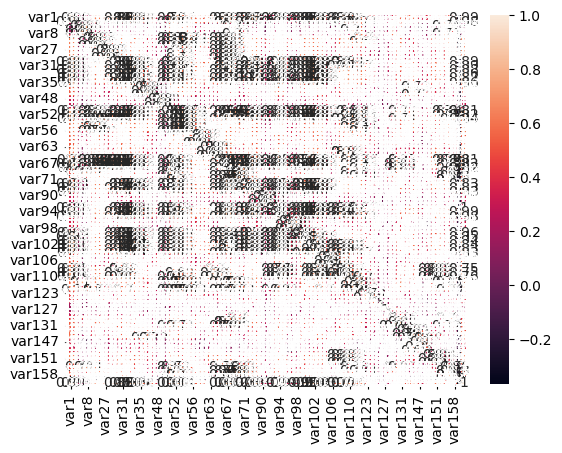

In [81]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [82]:
df.describe()

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
count,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,...,6.471000e+03,6.471000e+03,6471.000000,6471.000000,6471.000000,6.471000e+03,6.471000e+03,6.471000e+03,6471.000000,6.471000e+03
mean,8.443076e+06,8.012686e+06,3.850410e+05,3.368452e+05,2.730831e+05,2.359174e+06,2.245647e+06,2.144115e+06,1.482593e+06,1.407929e+06,...,1.792534e+05,1.822128e+05,23.258847,22.819039,21.919332,1.206614e+06,1.119322e+06,1.046329e+06,8.729717,8.613391e+06
std,1.745423e+07,1.684724e+07,7.191635e+06,5.848297e+06,2.817225e+06,6.241335e+06,6.002057e+06,5.842381e+06,4.293159e+06,4.068752e+06,...,1.244838e+06,1.038221e+06,49.106894,49.058104,46.644593,4.826344e+06,3.964658e+06,3.348739e+06,6.769308,1.782583e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.080911e+07,-3.185507e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.960010e+05,6.319170e+05,1.351000e+03,1.297500e+03,1.515500e+03,9.368650e+04,8.911900e+04,8.089400e+04,3.076150e+04,3.086850e+04,...,1.480500e+03,1.252500e+03,5.000000,5.000000,5.000000,8.584000e+03,5.799500e+03,5.195000e+02,3.000000,7.090115e+05
50%,2.131702e+06,2.041619e+06,1.808200e+04,1.722700e+04,1.621800e+04,4.580000e+05,4.320280e+05,4.022180e+05,1.737700e+05,1.676030e+05,...,1.999700e+04,1.846700e+04,11.000000,11.000000,10.000000,1.590050e+05,1.500000e+05,1.403590e+05,8.000000,2.181069e+06
75%,7.412975e+06,6.839315e+06,9.997550e+04,9.191950e+04,8.834200e+04,1.855086e+06,1.816219e+06,1.708616e+06,8.805585e+05,8.614465e+05,...,1.213655e+05,1.063150e+05,22.000000,22.000000,21.000000,7.944990e+05,7.716975e+05,7.626965e+05,14.000000,7.422948e+06
max,1.478231e+08,1.954054e+08,3.949990e+08,4.236760e+08,1.218370e+08,1.822085e+08,1.819357e+08,1.819572e+08,9.040429e+07,8.979462e+07,...,1.384342e+07,2.333264e+07,1384.000000,1307.000000,1244.000000,2.025610e+08,1.872810e+08,1.169022e+08,24.000000,1.754113e+08


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   var1         6471 non-null   int64
 1   var2         6471 non-null   int64
 2   var6         6471 non-null   int64
 3   var7         6471 non-null   int64
 4   var8         6471 non-null   int64
 5   var9         6471 non-null   int64
 6   var10        6471 non-null   int64
 7   var11        6471 non-null   int64
 8   var27        6471 non-null   int64
 9   var28        6471 non-null   int64
 10  var29        6471 non-null   int64
 11  var30        6471 non-null   int64
 12  var31        6471 non-null   int64
 13  var32        6471 non-null   int64
 14  var33        6471 non-null   int64
 15  var34        6471 non-null   int64
 16  var35        6471 non-null   int64
 17  var45        6471 non-null   int64
 18  var46        6471 non-null   int64
 19  var47        6471 non-null   int64
 20  var48   

In [84]:
X = df.iloc[:,0:-2] # Features tutte le 95variabili... perchè non -1? non voglio la colonna Total_Zeros che ho aggiunto per filtrare il threshold degli zeri riga
y = df.iloc[:,-1]     # Target
#or
#y = df['costi']

In [85]:
X.shape,y.shape

((6471, 89), (6471,))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [91]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=89344830321.54019 R2=0.9997250748879024
Test set:  MSE=264660454811.62296 R2=0.999120004409854
Lambda is: 0.001
Train set:  MSE=89344831258.3342 R2=0.9997250748850198
Test set:  MSE=264660481233.96262 R2=0.9991200043219999
Lambda is: 0.01
Train set:  MSE=89344840633.9318 R2=0.9997250748561699
Test set:  MSE=264660745401.85107 R2=0.999120003443642
Lambda is: 0.1
Train set:  MSE=89344935151.83148 R2=0.9997250745653267
Test set:  MSE=264663381537.11502 R2=0.9991199946784965
Lambda is: 1
Train set:  MSE=89345951921.07411 R2=0.9997250714366017
Test set:  MSE=264689198836.90088 R2=0.9991199088360159
Lambda is: 10
Train set:  MSE=89360136718.84026 R2=0.9997250277882216
Test set:  MSE=264901989490.47122 R2=0.9991192013074321


In [92]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [93]:
elastic.intercept_

-5964.059368280694

In [94]:
elastic.coef_

array([ 8.08524586e-01,  1.26982052e-01,  8.42909853e-02, -6.38518438e-02,
       -3.33918468e-02,  1.04913636e-01, -6.97361992e-02, -6.43632118e-02,
       -7.16017907e-01,  1.30522100e+00, -5.96232266e-01,  5.94298601e-02,
       -8.52409946e-02, -1.22477545e-02,  2.33867194e-02, -8.12647229e-03,
       -7.65448779e-03,  1.03699341e-01, -1.38619117e-01, -6.79392870e-03,
       -8.20368859e-02, -1.03226193e-01,  1.38228238e-01, -1.06305130e-02,
        2.44267123e-02,  3.37531948e-03, -6.50686946e-02,  6.39475694e-02,
        1.54510144e-02,  1.51799088e-02, -4.99382449e-02,  4.23975142e-02,
        5.61450833e-01, -1.12021555e+00,  5.84531291e-01, -5.98917068e-02,
        6.37876676e-02,  1.29305280e-02,  2.01959063e-01,  3.78312663e-02,
       -7.78391020e-02, -2.53428269e-02,  7.27321923e-04,  1.43865159e-02,
       -1.33568720e-01,  1.36420811e-01,  4.23332042e-03,  3.67672760e-01,
       -2.76480141e-01, -1.35297270e-01, -8.56182625e-01,  5.82525454e-01,
        1.39951101e-01,  

In [95]:
y_pred = elastic.predict(X_test)

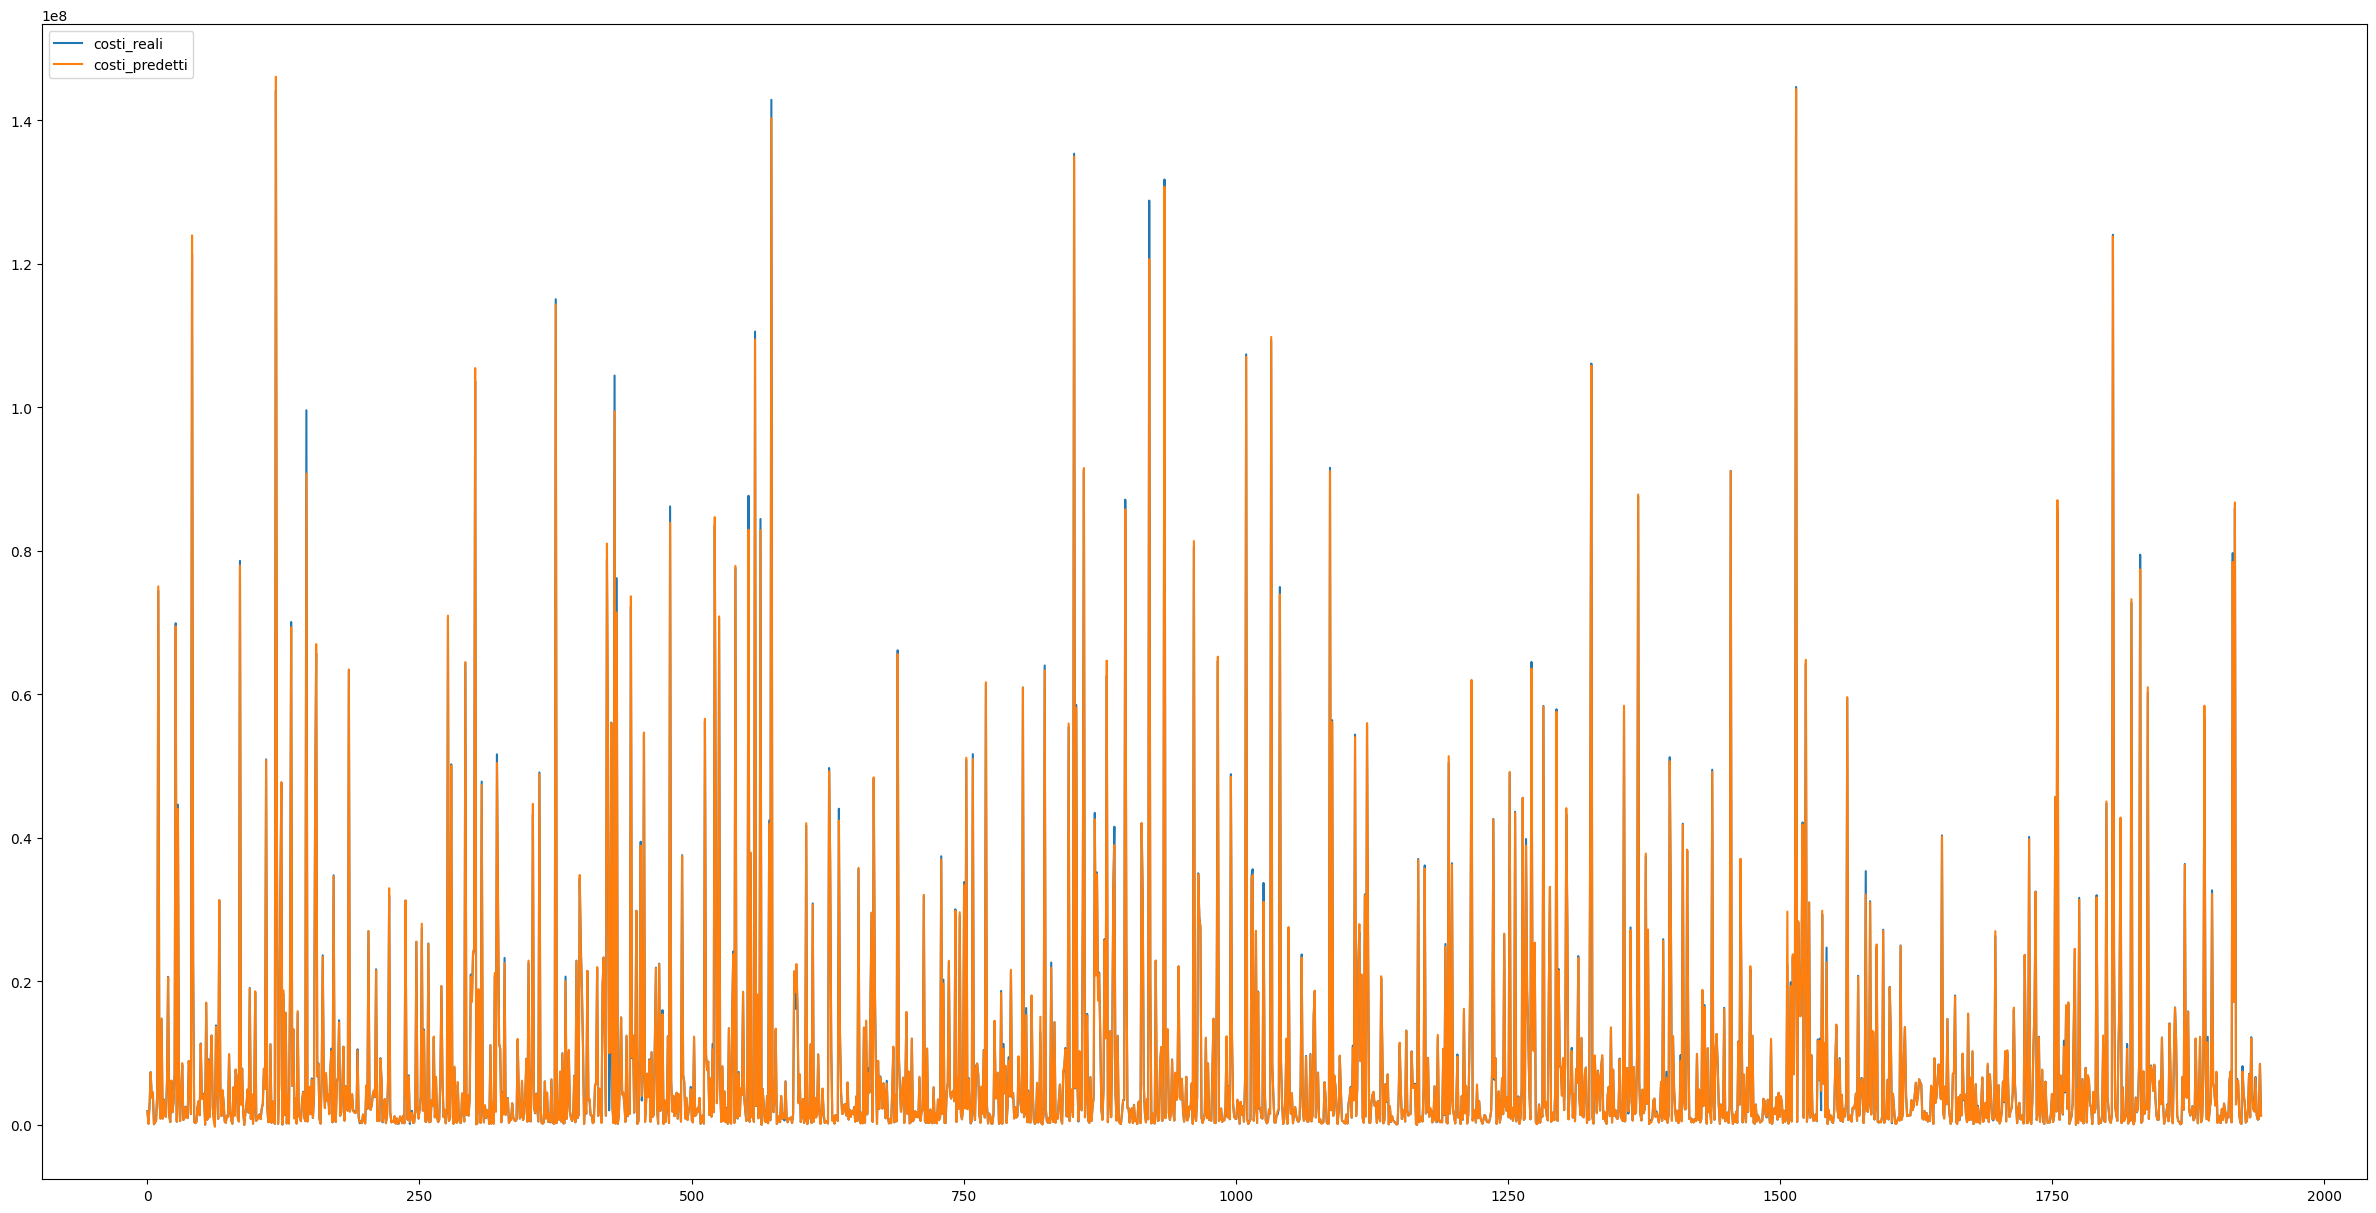

In [96]:
import numpy as np
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(30,15))
plt.plot(x, y_test, label='costi_reali')
plt.plot(x, y_pred, label='costi_predetti')
plt.legend(loc=2);

## Riduciamo il numero di variabili: "Feature Engineering"

In [97]:
# Al momento abbiamo 95 regressori!!!!!!! insostenibile

In [98]:
corrmat = df.corr()
corrmat.index.values

array(['var1', 'var2', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33',
       'var34', 'var35', 'var45', 'var46', 'var47', 'var48', 'var49',
       'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var63', 'var64', 'var65', 'var66',
       'var67', 'var68', 'var69', 'var70', 'var71', 'var84', 'var85',
       'var86', 'var90', 'var91', 'var92', 'var93', 'var94', 'var95',
       'var96', 'var97', 'var98', 'var99', 'var100', 'var101', 'var102',
       'var103', 'var104', 'var105', 'var106', 'var107', 'var108',
       'var109', 'var110', 'var111', 'var112', 'var113', 'var123',
       'var124', 'var125', 'var126', 'var127', 'var128', 'var129',
       'var130', 'var131', 'var141', 'var142', 'var143', 'var147',
       'var148', 'var149', 'var150', 'var151', 'var152', 'var156',
       'var157', 'var158', 'Total_Zeros', 'costi'], dtype=object)

In [99]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [100]:
threshold_corr = 0.90
corr_value = getCorrelatedFeature(corrmat['costi'], threshold_corr)
corr_value

,Corr Value
var1,0.986923
var2,0.979383
var93,0.998298
var94,0.986096
var95,0.978434
var99,0.958575
var100,0.946394
var101,0.938331
costi,1.000000


In [101]:
df_rid = df[corr_value.index]
df_rid

,var1,var2,var93,var94,var95,var99,var100,var101,costi
0,147823139,148193655,145914503,148992105,149021406,85824629,86758885,83651116,144205134
1,147562322,163251010,142727898,150222876,166417107,102237238,113037130,131392006,140165127
2,147562000,142652000,148757000,153783000,148906000,117422000,111227000,108035000,145190000
3,147067625,140160124,119349203,145528364,143260149,105779603,129982682,121831610,112760368
4,145273739,127413305,174796438,148011089,130682792,149110551,119058121,106955719,171980718
...,...,...,...,...,...,...,...,...,...
6466,0,0,580433,505522,441838,0,0,0,30000
6467,0,0,196707,137271,126648,148366,47631,0,7369
6468,0,0,534634,597363,560580,163,206,1144,0
6469,0,0,230001,232342,231989,0,0,7,0


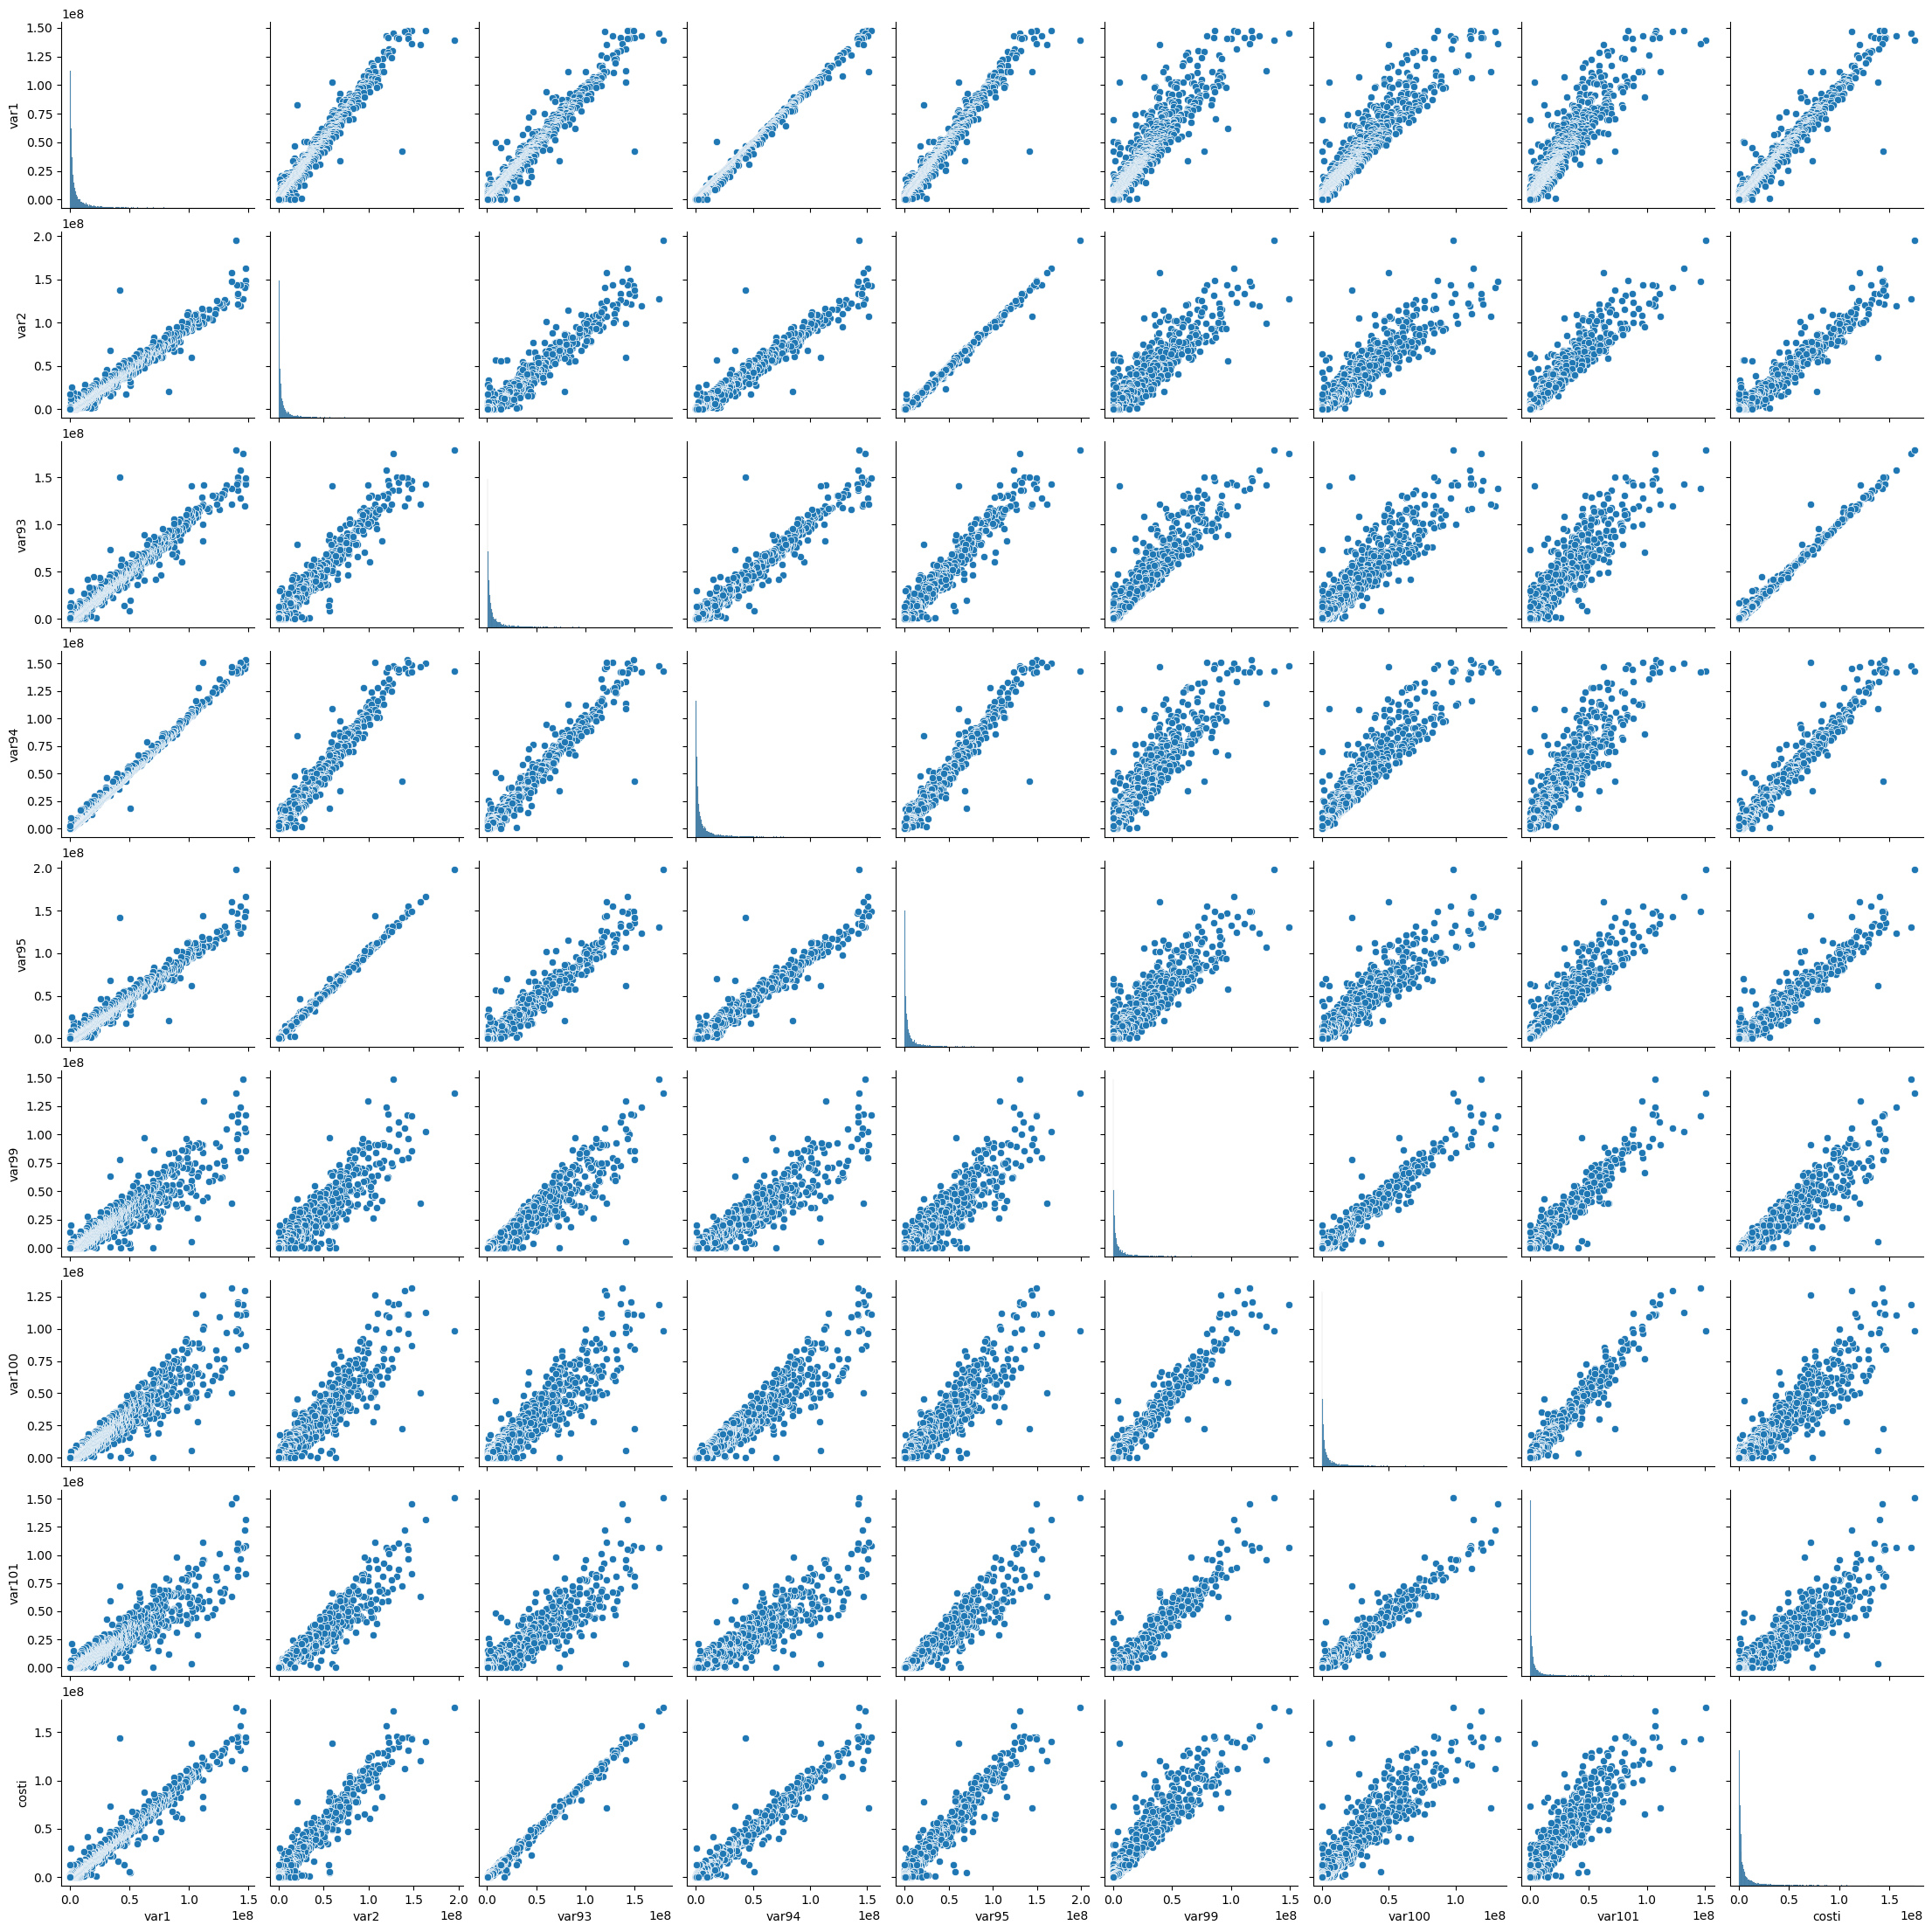

In [102]:
sns.pairplot(df_rid)

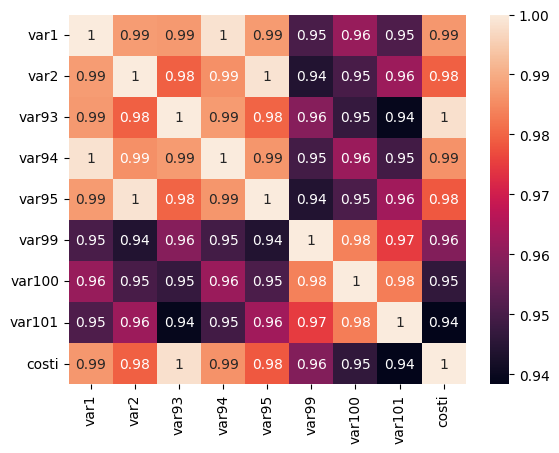

In [103]:
sns.heatmap(df_rid.corr(numeric_only=True), annot=True);

In [104]:
X = df_rid.drop(columns=['costi'])
y = df_rid['costi']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667,
                                                    )

In [107]:
model_slim = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_slim.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [108]:
y_pred = model_slim.predict(X_test)

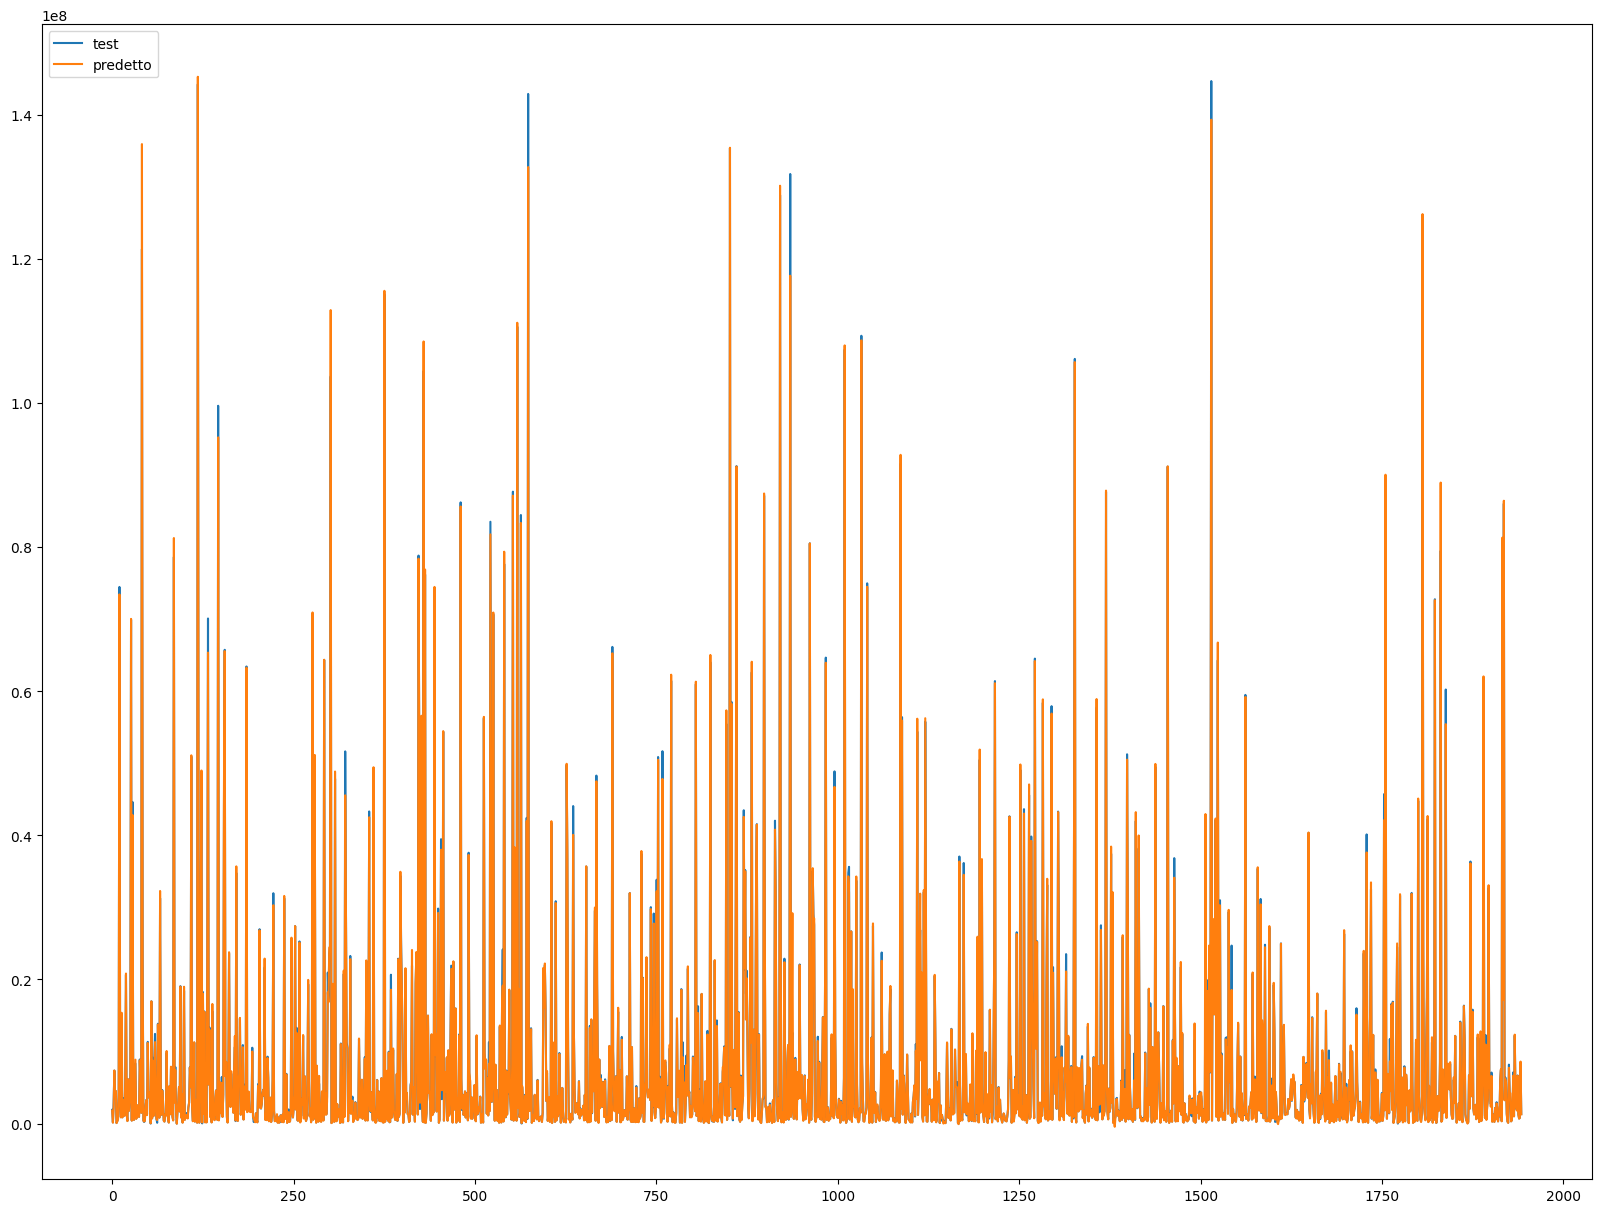

In [109]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [110]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', round(r2score,4))
print('MAE: ', round(mae,2))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))

R2_score:  0.9963
MAE:  277687.64
MSE:  1116571530120.09
RMSE:  1056679.48


In [111]:
import joblib

## to save a model
joblib.dump(model_slim,'regression_real_case8_input.pkl')

['regression_real_case8_input.pkl']

In [112]:
## to load model
loaded_model = joblib.load('regression_real_case8_input.pkl')
loaded_model

ElasticNet(alpha=0.01)

In [113]:
test = X.iloc[0:1].values[0].tolist()
test

[147823139,
 148193655,
 145914503,
 148992105,
 149021406,
 85824629,
 86758885,
 83651116]

In [114]:
#res = loaded_model.predict([[1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000]])[0]
res = loaded_model.predict([test])[0]

round(res,2)

145241574.41

In [115]:
# intercetta
loaded_model.intercept_

-29554.255488868803

In [116]:
# Tabella per excel 
beta ={
        'variabile' : X.columns.to_list(),
        'pesi':loaded_model.coef_.tolist()
        }
tab = pd.DataFrame(beta)
tab

# costi = intercetta + 0.261505 * var1 + 0.572213 * var2 + 0.913673 * var93 + (-0.183165) * var94 + (-0.561466) * var95 + 0.108055 * var99 + (-0.057827) * var100 + (-0.059076) * var101

,variabile,pesi
0,var1,0.421057
1,var2,0.599250
2,var93,1.001791
3,var94,-0.436444
4,var95,-0.578536
5,var99,-0.006109
6,var100,0.078767
7,var101,-0.083922


<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/didit.png' width=650>